### Exploring data, getting an initial look
***Data from:***

Natural Earth / geojson.xyz

National Park Service unit boundaries: https://irma.nps.gov/DataStore/Reference/Profile/2224545?lnv=True

Utah National Monuments and Conservation Areas: https://gis.utah.gov/data/boundaries/

GBIF | Global Biodiversity Information Facility: https://www.gbif.org/ 

In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# change default max columns
pd.set_option('display.max_columns', None)

In [2]:
# import us states and provinces
us_states = gpd.read_file ("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson")

# verify type
type(us_states)

geopandas.geodataframe.GeoDataFrame

In [3]:
# check coordinate reference system
us_states.crs # {'init': 'epsg:4326'} web mercator

{'init': 'epsg:4326'}

In [4]:
us_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     51 non-null     int64   
 1   adm1_code     51 non-null     object  
 2   diss_me       51 non-null     int64   
 3   adm1_cod_1    51 non-null     object  
 4   iso_3166_2    51 non-null     object  
 5   wikipedia     51 non-null     object  
 6   sr_sov_a3     51 non-null     object  
 7   sr_adm0_a3    51 non-null     object  
 8   iso_a2        51 non-null     object  
 9   adm0_sr       51 non-null     int64   
 10  admin0_lab    51 non-null     int64   
 11  name          51 non-null     object  
 12  name_alt      51 non-null     object  
 13  name_local    0 non-null      object  
 14  type          51 non-null     object  
 15  type_en       51 non-null     object  
 16  code_local    51 non-null     object  
 17  code_hasc     51 non-null     object  
 18  note

In [5]:
us_states.head()

,scalerank,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,adm0_sr,admin0_lab,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,region_big,big_code,provnum_ne,gadm_level,check_me,scaleran_1,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,featureclass,geometry
0,2,USA-3514,3514,USA-3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US1,USA,US,1,2,Minnesota,MN|Minn.,None,State,State,US32,US.MN,None,None,Midwest,None,West North Central,None,0,1,10,2,1,Minn.,MN,0,-99,0,Admin-1 scale rank,United States of America,9,1,1,Admin-1 scale rank,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,2,USA-3515,3515,USA-3515,US-MT,http://en.wikipedia.org/wiki/Montana,US1,USA,US,1,2,Montana,MT|Mont.,None,State,State,US30,US.MT,None,None,West,None,Mountain,None,0,1,0,2,1,Mont.,MT,0,-99,0,Admin-1 scale rank,United States of America,7,1,1,Admin-1 scale rank,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,2,USA-3516,3516,USA-3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US1,USA,US,1,2,North Dakota,ND|N.D.,None,State,State,US38,US.ND,None,None,Midwest,None,West North Central,None,0,1,0,2,1,N.D.,ND,0,-99,0,Admin-1 scale rank,United States of America,12,1,1,Admin-1 scale rank,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,2,USA-3517,3517,USA-3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US1,USA,US,8,2,Hawaii,HI|Hawaii,None,State,State,US15,US.HI,None,None,West,None,Pacific,None,0,1,0,2,1,Hawaii,HI,0,-99,0,Admin-1 scale rank,United States of America,6,1,1,Admin-1 scale rank,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,2,USA-3518,3518,USA-3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US1,USA,US,1,2,Idaho,ID|Idaho,None,State,State,US16,US.ID,None,None,West,None,Mountain,None,0,1,0,2,1,Idaho,ID,0,-99,0,Admin-1 scale rank,United States of America,5,1,1,Admin-1 scale rank,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."


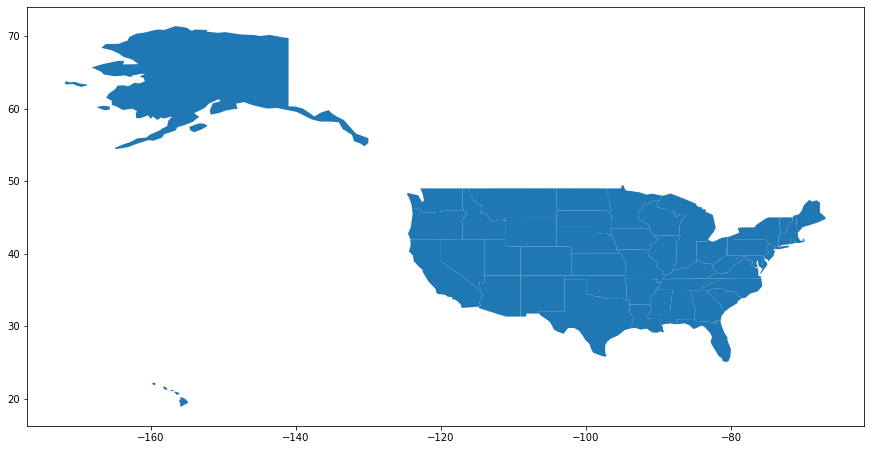

In [6]:
# plot us_states
us_states.plot(figsize=(15,15));

In [7]:
# import national park units for entire US
us_nps = gpd.read_file ("./data/NPS_-_Land_Resources_Division_Boundary_and_Tract_Data_Service.shp")

# verify type
type(us_nps)

geopandas.geodataframe.GeoDataFrame

In [8]:
# check coordinate reference system
us_nps.crs # {'init': 'epsg:3857'}

{'init': 'epsg:3857'}

In [9]:
# inspect data fields for nps units
# there is a state field that would allow us to filter and only show national parks in the state of Utah 
# but we want to do this spatially
us_nps.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    426 non-null    int64   
 1   UNIT_CODE   426 non-null    object  
 2   GIS_Notes   426 non-null    object  
 3   UNIT_NAME   426 non-null    object  
 4   DATE_EDIT   426 non-null    object  
 5   STATE       426 non-null    object  
 6   REGION      426 non-null    object  
 7   GNIS_ID     426 non-null    object  
 8   UNIT_TYPE   426 non-null    object  
 9   CREATED_BY  426 non-null    object  
 10  METADATA    426 non-null    object  
 11  PARKNAME    426 non-null    object  
 12  CreationDa  426 non-null    object  
 13  Creator     426 non-null    object  
 14  EditDate    426 non-null    object  
 15  Editor      426 non-null    object  
 16  Shape__Are  426 non-null    float64 
 17  Shape__Len  426 non-null    float64 
 18  GlobalID    426 non-null    object  
 19  

In [10]:
# inspect first 5 records
us_nps.head()

,OBJECTID,UNIT_CODE,GIS_Notes,UNIT_NAME,DATE_EDIT,STATE,REGION,GNIS_ID,UNIT_TYPE,CREATED_BY,METADATA,PARKNAME,CreationDa,Creator,EditDate,Editor,Shape__Are,Shape__Len,GlobalID,geometry
0,1,AMME,PRELIMINARY - Data has not completed the entir...,American Memorial Park,2015-04-22,MP,PW,1879026,Park,Lands,Preliminary data. Contact the Land Resources P...,American Memorial Park,2020-01-09,SCarlton@nps.gov_nps,2020-01-09,SCarlton@nps.gov_nps,6.113585e+05,7740.973865,79037b52-9d9c-4f8c-b65b-70b810814fb0,"POLYGON ((16221864.905 1714852.206, 16221867.9..."
1,2,CEBE,Lands - http://landsnet.nps.gov/tractsnet/docu...,Cedar Creek and Belle Grove National Historica...,2005-04-07,VA,NE,1985663,National Historical Park,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Cedar Creek & Belle Grove,2020-01-09,SCarlton@nps.gov_nps,2020-06-04,RJohnson@nps.gov_nps,2.328283e+07,53250.857647,dfdc7906-209d-42e5-95e8-5a0377ca9b06,"MULTIPOLYGON (((-8715759.414 4724026.776, -871..."
2,3,LIBI,Lands - http://landsnet.nps.gov/tractsnet/docu...,Little Bighorn Battlefield National Monument,2005-02-23,MT,IM,806297,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Little Bighorn Battlefield,2020-01-09,SCarlton@nps.gov_nps,2020-06-04,RJohnson@nps.gov_nps,6.437513e+06,19524.580108,a3affc26-f98a-417d-aa5b-41cfb4988cc8,"MULTIPOLYGON (((-11953415.314 5703937.476, -11..."
3,4,CAVO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Capulin Volcano National Monument,2004-07-22,NM,IM,936867,National Monument,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Capulin Volcano,2020-01-09,SCarlton@nps.gov_nps,2020-06-04,RJohnson@nps.gov_nps,4.997144e+06,10529.570772,646548c2-c5b8-4298-a6b2-a82b5977581e,"POLYGON ((-11575101.835 4409222.280, -11574603..."
4,5,FOBO,Lands - http://landsnet.nps.gov/tractsnet/docu...,Fort Bowie National Historic Site,2004-05-12,AZ,IM,1888916,National Historic Site,Lands,https://irma.nps.gov/DataStore/Reference/Profi...,Fort Bowie,2020-01-09,SCarlton@nps.gov_nps,2020-06-04,RJohnson@nps.gov_nps,5.650399e+06,18638.556950,a19874b5-9d2e-409b-ba2a-8b52f4649602,"POLYGON ((-12187153.674 3783174.666, -12187626..."


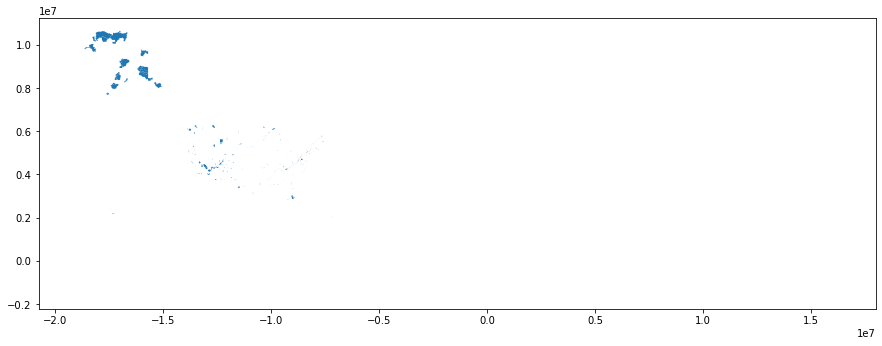

In [11]:
# plot national parks in the US and territories
us_nps.plot(figsize=(15,15));

In [12]:
# import national monuments and conservation areas in Utah
ut_nms = gpd.read_file ("./data/BLMMonumentsAndNCAs.shp")

# verify type
type(ut_nms)

geopandas.geodataframe.GeoDataFrame

In [13]:
# check coordinate reference system
ut_nms.crs # {'init': 'epsg:26912'}

{'init': 'epsg:26912'}

In [14]:
# inspect first 5 rows of Utah National Monuments
ut_nms.head()

,NLCS_ID,NLCS_NAME,CASEFILE_N,NLCS_TYPE,ADMIN_ST,Shape_Leng,Shape_Area,geometry
0,NLCS000853,Beaver Dam Wash - Designated Road Area,UNK,National Conservation Area,UT,31518.003797,4.127071e+07,"POLYGON ((247247.560 4108697.080, 247231.790 4..."
1,NLCS000853,Beaver Dam Wash - Designated Road Area,UNK,National Conservation Area,UT,45362.282685,9.899313e+07,"POLYGON ((234383.940 4111872.210, 234384.070 4..."
2,NLCS000854,Beaver Dam Wash,UNK,National Conservation Area,UT,63883.361667,6.104458e+07,"POLYGON ((237919.940 4112730.020, 237916.830 4..."
3,NLCS000854,Beaver Dam Wash,UNK,National Conservation Area,UT,33139.455448,2.264953e+07,"POLYGON ((231949.330 4118595.890, 232352.060 4..."
4,NLCS000853,Beaver Dam Wash - Designated Road Area,UNK,National Conservation Area,UT,44248.805230,6.780567e+07,"POLYGON ((231779.250 4126670.990, 231779.830 4..."


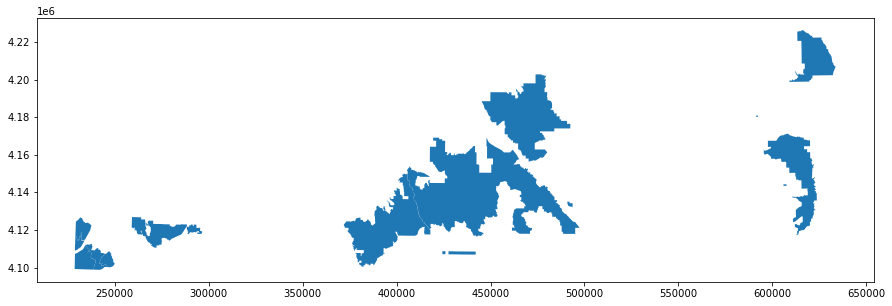

In [15]:
# plot Utah National Monuments
ut_nms.plot(figsize=(15,15));

In [16]:
# read birds csv a GeoPandasDataFrame, adding encoding to UTF-8 allows geoJSON export later in notebook
sw_birds = gpd.read_file('./data/11birdspecies_southwest.csv', encoding='UTF-8')

In [17]:
# verify type
type(sw_birds)

geopandas.geodataframe.GeoDataFrame

In [18]:
# get basic info birds - lat lons are string type, geomtry field isn't being interpreted by GeoPandas
sw_birds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27975 entries, 0 to 27974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   field_1                 27975 non-null  object  
 1   individualCount         27975 non-null  object  
 2   occurrenceStatus        27975 non-null  object  
 3   year                    27975 non-null  object  
 4   month                   27975 non-null  object  
 5   day                     27975 non-null  object  
 6   stateProvince           27975 non-null  object  
 7   county                  27975 non-null  object  
 8   locality                27975 non-null  object  
 9   decimalLatitude         27975 non-null  object  
 10  decimalLongitude        27975 non-null  object  
 11  scientificName          27975 non-null  object  
 12  vernacularName          27975 non-null  object  
 13  verbatimScientificName  27975 non-null  object  
 14  geometry      

In [19]:
# convert lat/lon to series to convert to floating point values
sw_birds[["decimalLatitude", "decimalLongitude"]] = sw_birds[["decimalLatitude", "decimalLongitude"]].apply(pd.to_numeric)

In [20]:
sw_birds.info() # verify conversion to float

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27975 entries, 0 to 27974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   field_1                 27975 non-null  object  
 1   individualCount         27975 non-null  object  
 2   occurrenceStatus        27975 non-null  object  
 3   year                    27975 non-null  object  
 4   month                   27975 non-null  object  
 5   day                     27975 non-null  object  
 6   stateProvince           27975 non-null  object  
 7   county                  27975 non-null  object  
 8   locality                27975 non-null  object  
 9   decimalLatitude         27975 non-null  float64 
 10  decimalLongitude        27975 non-null  float64 
 11  scientificName          27975 non-null  object  
 12  vernacularName          27975 non-null  object  
 13  verbatimScientificName  27975 non-null  object  
 14  geometry      

In [21]:
# create geopandas geometry from lat/lon
sw_birds = gpd.GeoDataFrame(
    sw_birds, geometry=gpd.points_from_xy(x=sw_birds.decimalLongitude, y=sw_birds.decimalLatitude))

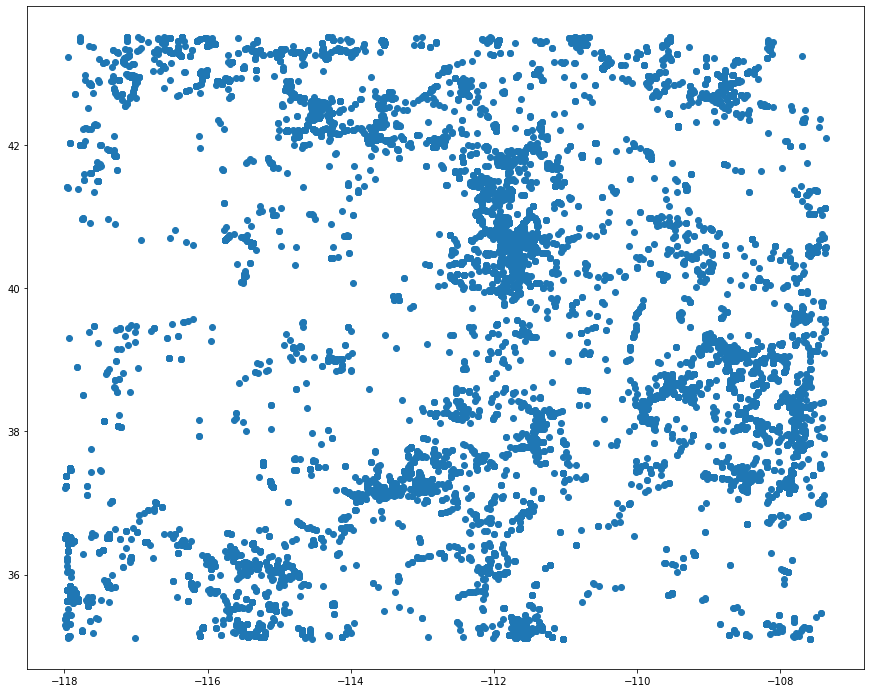

In [22]:
# plot birds data
sw_birds.plot(figsize=(15,15));

In [23]:
sw_birds.to_file("./data/sw_birds.geojson", driver='GeoJSON')